**Assignment 3**

_This notebook contains simple starter code to show loading and displaying a pair of test images and the associated flow._

In [1]:
# Adapted helper routine from Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow.

# Common imports
import numpy as np
import os
import skimage 

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "./"
NB_ID = "assignment3"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

/home/azhang/.local/lib/python3.5/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "GTKAgg" on line #1
	"backend: GTKAgg
"
	in file "/home/azhang/.config/matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'gtkagg': valid strings are ['svg', 'WebAgg', 'Qt4Agg', 'GTK3Agg', 'Qt5Agg', 'Qt4Cairo', 'WXCairo', 'TkAgg', 'pdf', 'nbAgg', 'WX', 'template', 'WXAgg', 'cairo', 'Qt5Cairo', 'agg', 'ps', 'TkCairo', 'MacOSX', 'pgf', 'GTK3Cairo']
  (val, error_details, msg))


Let's load the image pairs and the corresponding flow 

In [2]:
train_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_train.npy'))

In [3]:
train_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_train.npy'))

In [4]:
print('Size of training images: {0} x {1} x {2} x {3}\n'.format(*train_images.shape))
print('Size of flow results: {0} x {1} x {2} x {3}\n'.format(*train_flows.shape))

Size of training images: 1860 x 6 x 64 x 64

Size of flow results: 1860 x 4 x 64 x 64



For RGB images, we need the channels last, e.g., 64x64x3.

In [5]:
def make_RGB(img_arr, img_no, seq_no ): 
    test = np.zeros(img_arr.shape[2:]+(3,))  
    test[:,:,2] = img_arr[img_no,0+3*seq_no,:,:] 
    test[:,:,1] = img_arr[img_no,1+3*seq_no,:,:] 
    test[:,:,0] = img_arr[img_no,2+3*seq_no,:,:]
    return test

In [6]:
def make_Greyscale(img_arr, img_no, seq_no ): 
    return img_arr[img_no,seq_no,:,:] 

Saving figure example_data


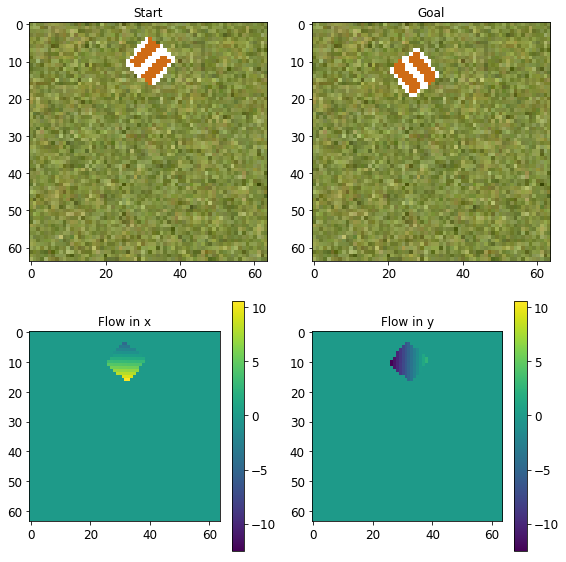

In [7]:
img_num = 100

fig, axes = plt.subplots(2, 2,figsize=(8,8))
axes[0, 0].imshow(make_RGB(train_images, img_num, 0 ))
axes[0, 0].set_title('Start')    

axes[0, 1].imshow(make_RGB(train_images, img_num, 1 ))
axes[0, 1].set_title('Goal')    

# Find the min and max of the flow.
from matplotlib import colors
fl_min = np.min(train_flows[img_num,0:2,:,:])
fl_max = np.max(train_flows[img_num,0:2,:,:])
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

im = axes[1, 0].imshow(make_Greyscale(train_flows, img_num, 0 ))
im.set_norm(fl_norm)
axes[1, 0].set_title('Flow in x')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(make_Greyscale(train_flows, img_num, 1 ))
im.set_norm(fl_norm)
axes[1, 1].set_title('Flow in y')
fig.colorbar(im,ax=axes[1, 1])

save_fig("example_data")


In [8]:
test_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_images_test.npy'))
test_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'rot_flows_test.npy'))

In [9]:
def GetInputSet(raw_images, concat_last_axis = True):
    """
    Function: concatenate each pair images together as input.
    """
    hm_images = len(raw_images)
    dataset = []
    for i in range(hm_images):
        img_start = make_RGB(raw_images, i, 0)
        img_goal = make_RGB(raw_images, i, 1)
        # concatenate on the last dimension
        if concat_last_axis:
            imgs_concat = np.concatenate([img_start, img_goal], axis = -1)
        else:
            imgs_concat = np.concatenate([img_start, img_goal], axis = 0)
        dataset.append(imgs_concat)
    dataset = np.array(dataset)
    return dataset

def GetOutputset(raw_gts, concat_last_axis = True):
    """
    Function: get the corresponding ground truth vectors.
    """
    hm_gts = len(raw_gts)
    dataset = []
    for i in range(hm_gts):
        # expand the last dimension for concatenating
        gt_x = np.expand_dims(make_Greyscale(raw_gts, i, 0), axis=-1)
        gt_y = np.expand_dims(make_Greyscale(raw_gts, i, 1), axis=-1)
        # concatenate on the last dimension
        if concat_last_axis:
            gt_concat = np.concatenate([gt_x, gt_y], axis = -1)
        else:
            gt_concat = np.concatenate([gt_x, gt_y], axis = 0)
        dataset.append(gt_concat)
    dataset = np.array(dataset)
    return dataset

In [10]:
train_in = GetInputSet(train_images)
train_out = GetOutputset(train_flows)

test_in = GetInputSet(test_images)
test_out = GetOutputset(test_flows)

print("Shape of the training images:\t", train_in.shape)
print("Shape of the training flows:\t",train_out.shape)
print("Shape of the test images:\t",test_in.shape)
print("Shape of the test flows:\t",test_out.shape)

Shape of the training images:	 (1860, 64, 64, 6)
Shape of the training flows:	 (1860, 64, 64, 2)
Shape of the test images:	 (444, 64, 64, 6)
Shape of the test flows:	 (444, 64, 64, 2)


In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
# import tf.keras
import tensorflow.keras.backend as K
K.clear_session()
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as L
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau
import tensorflow.keras.regularizers as R
from tensorflow.keras.optimizers import Adam

def Loss(y_true, y_pred):
    weight_vector = tf.where(y_true==0., 0.2*K.ones_like(y_true), 0.8*K.ones_like(y_true))
    # return K.mean(K.square(y_true - y_pred)*weight_vector)
    return K.mean(K.square(y_pred - y_true))

def Metrics(y_true, y_pred):
    # weight_vector = tf.where(y_true==0., 0.2*K.ones_like(y_true), 0.8*K.ones_like(y_true))
    value = K.abs(y_true - y_pred)
    false_pred = K.cast(K.greater(value, 1e-3), 'float32') # * weight_vector
    whole_ones = K.ones_like(value) # * weight_vector
    return K.sum(1. - false_pred) / K.sum(whole_ones)

K.clear_session()

model = Sequential()
model.add(L.Conv2D(64, (3, 3), strides=(1, 1), padding='same', \
                   activation='relu', input_shape=(64, 64, 6)))
model.add(L.Conv2D(128, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu'))
model.add(L.Conv2D(256, (3, 3), strides=(1, 1), padding='same', \
                   activation='relu'))
model.add(L.Conv2D(512, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu'))
model.add(L.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu'))
model.add(L.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', \
                   activation='relu'))
model.add(L.Conv2D(2, (3, 3), strides=(1, 1), padding='same', \
                   activation='linear'))

# GPU memory management
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=3, min_lr=1e-5)

model.compile(loss=Loss, optimizer=Adam(lr=0.0008), metrics=[Metrics])

model.fit(train_in, train_out, batch_size=10, epochs=15,
#             validation_data=(test_in, test_out),
            callbacks=[reduce_lr])


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Epoch 1/15
1860/1860 [==============================] - 11s 6ms/step - loss: 0.4957 - Metrics: 0.0792
Epoch 2/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.2209 - Metrics: 0.1366
Epoch 3/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.1548 - Metrics: 0.7966
Epoch 4/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.1170 - Metrics: 0.8533
Epoch 5/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.0918 - Metrics: 0.8722
Epoch 6/15
1860/1860 [==============================] - 8s 5ms/step - loss: 0.0727 - Metrics: 0.8933
Epoch 7/15
1860/1860 [==============================] - 8s 4ms/step - loss: 0.0613 - Metrics: 0.9020
Epoch 8/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.0530 - Metrics: 0.9117
Epoch 9/15
1860/1860 [==============================] - 9s 5ms/step - loss: 0.0465 - Metrics: 0.9153
Epoch 10/15
1860/1860 [==============================] - 8s 5ms/step - loss: 0.0407 - Metr

In [12]:
model.evaluate(test_in, test_out)

444/444 [==============================] - 1s 2ms/step


[0.03337196797669471, 0.9411236176619658]

(64, 64, 2)
(64, 64, 2)
Prediction and ground truth of the example images in the test set.


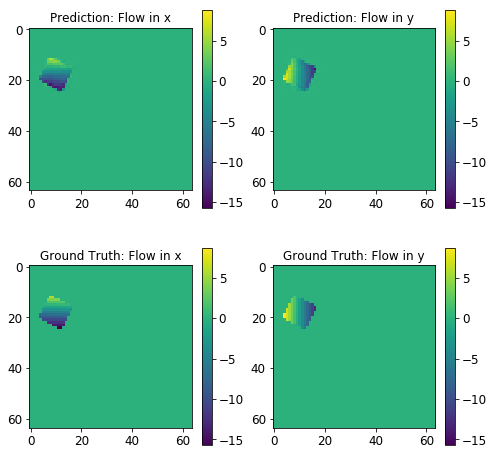

In [13]:
random_test_number = 101

test_example_images = np.expand_dims(test_in[random_test_number], axis=0)
test_example_gt = test_out[random_test_number]
test_example_pred = model.predict(test_example_images)
test_example_pred = np.squeeze(test_example_pred)
test_example_gt = np.squeeze(test_example_gt)
print(test_example_pred.shape)
print(test_example_gt.shape)

fl_min = np.min(test_example_gt)
fl_max = np.max(test_example_gt)
fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

fig, axes = plt.subplots(2, 2,figsize=(8,8))

print("Prediction and ground truth of the example images in the test set.")
im = axes[0, 0].imshow(test_example_pred[..., 0])
# im = axes[0, 0].imshow(test_example_pred[:len(test_example_pred)//2, :])
im.set_norm(fl_norm)
axes[0, 0].set_title('Prediction: Flow in x')
fig.colorbar(im,ax=axes[0, 0])

im = axes[0, 1].imshow(test_example_pred[..., 1])
# im = axes[0, 1].imshow(test_example_pred[len(test_example_pred)//2:, :])
im.set_norm(fl_norm)
axes[0, 1].set_title('Prediction: Flow in y')
fig.colorbar(im,ax=axes[0, 1])

im = axes[1, 0].imshow(test_example_gt[..., 0])
# im = axes[1, 0].imshow(test_example_gt[:len(test_example_gt)//2, ...])
im.set_norm(fl_norm)
axes[1, 0].set_title('Ground Truth: Flow in x')
fig.colorbar(im,ax=axes[1, 0])

im = axes[1, 1].imshow(test_example_gt[..., 1])
# im = axes[1, 1].imshow(test_example_gt[len(test_example_gt)//2:, ...])
im.set_norm(fl_norm)
axes[1, 1].set_title('Ground Truth: Flow in y')
fig.colorbar(im,ax=axes[1, 1])

plt.show()

In [14]:
mix_train_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_images_train.npy'))
mix_train_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_flows_train.npy'))
mix_test_images = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_images_test.npy'))
mix_test_flows = np.load(os.path.join(PROJECT_ROOT_DIR, NB_ID, 'mix_flows_test.npy'))

mix_train_in = GetInputSet(mix_train_images, concat_last_axis=False)
mix_train_out = GetOutputset(mix_train_flows, concat_last_axis=False)
mix_test_in = GetInputSet(mix_test_images, concat_last_axis=False)
mix_test_out = GetOutputset(mix_test_flows, concat_last_axis=False)

rot_train_in = GetInputSet(train_images, concat_last_axis=False)
rot_train_out = GetOutputset(train_flows, concat_last_axis=False)
rot_test_in = GetInputSet(test_images, concat_last_axis=False)
rot_test_out = GetOutputset(test_flows, concat_last_axis=False)

print("Shape of the rotation training images:\t", rot_train_in.shape)
print("Shape of the rotation training flows:\t",rot_train_out.shape)
print("Shape of the rotation test images:\t",rot_test_in.shape)
print("Shape of the rotation test flows:\t",rot_test_out.shape)

print("Shape of the mixed training images:\t", mix_train_in.shape)
print("Shape of the mixed training flows:\t",mix_train_out.shape)
print("Shape of the mixed test images:\t",mix_test_in.shape)
print("Shape of the mixed test flows:\t",mix_test_out.shape)

Shape of the rotation training images:	 (1860, 128, 64, 3)
Shape of the rotation training flows:	 (1860, 128, 64, 1)
Shape of the rotation test images:	 (444, 128, 64, 3)
Shape of the rotation test flows:	 (444, 128, 64, 1)
Shape of the mixed training images:	 (1860, 128, 64, 3)
Shape of the mixed training flows:	 (1860, 128, 64, 1)
Shape of the mixed test images:	 (444, 128, 64, 3)
Shape of the mixed test flows:	 (444, 128, 64, 1)


In [61]:
import tensorflow.keras.applications as App
K.clear_session()

base_model = App.vgg16.VGG16(input_shape=(128, 64, 3), include_top=False, weights='imagenet')
vgg16_layers = Sequential()
for layer in base_model.layers[:10]:
    vgg16_layers.add(layer)

base_model.trainable = False
vgg16_layers.trainable = False
vgg16_layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 64, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 64, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 16, 256)       295168    
__________

In [62]:
header = L.InputLayer(input_shape=(128,64,3))

add_layer1 = L.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer2 = L.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer3 = L.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer4 = L.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer5 = L.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer6 = L.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer7 = L.Conv2D(1, (3, 3), strides=(1, 1), padding='same', \
                       activation='linear')

add_layer8 = L.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', \
                               activation='relu')
add_layer9 = L.Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', \
                               activation='relu')

vgg16_based_model = Sequential([header, vgg16_layers, add_layer3, add_layer8,
                               add_layer4, add_layer9, add_layer7])
vgg16_based_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 16, 256)       1735488   
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 32, 128)       295040    
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 64, 32, 128)       147584    
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 64, 64)       73792     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 128, 64, 64)       36928     
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 64, 1)        577       
Total params: 2,289,409
Trainable params: 553,921
Non-trainable params: 1,735,488
____________________________________________________________

In [63]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=1, min_lr=1e-5)

vgg16_based_model.compile(loss=Loss, optimizer=Adam(lr=0.0005), metrics=[Metrics])
vgg16_based_model.fit(rot_train_in, rot_train_out, batch_size=10, epochs=30,
#             validation_data=(test_in, test_out),
            callbacks=[reduce_lr])

Epoch 1/30
1860/1860 [==============================] - 7s 4ms/step - loss: 0.5981 - Metrics: 0.0130
Epoch 2/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5288 - Metrics: 0.0230
Epoch 3/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5190 - Metrics: 0.0338
Epoch 4/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5131 - Metrics: 0.0495
Epoch 5/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5092 - Metrics: 0.0665
Epoch 6/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5053 - Metrics: 0.1599
Epoch 7/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5022 - Metrics: 0.2768
Epoch 8/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4998 - Metrics: 0.3958
Epoch 9/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4944 - Metrics: 0.4374
Epoch 10/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4914 - Metri

In [64]:
random_test_number = 101

rot_test_example_images = np.expand_dims(rot_test_in[random_test_number], axis=0)
rot_test_example_gt = rot_test_out[random_test_number]
rot_test_example_pred = vgg16_based_model.predict(rot_test_example_images)
rot_test_example_pred = np.squeeze(rot_test_example_pred)
rot_test_example_gt = np.squeeze(rot_test_example_gt)

rot_fl_min = np.min(rot_test_example_gt)
rot_fl_max = np.max(rot_test_example_gt)
rot_fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

vgg16_based_model.evaluate(rot_test_in, rot_test_out)

444/444 [==============================] - 1s 2ms/step


[0.5104862556264207, 0.6991313217996477]

In [65]:
K.clear_session()

base_model = App.vgg16.VGG16(input_shape=(128, 64, 3), include_top=False, weights='imagenet')
vgg16_layers = Sequential()
for layer in base_model.layers[:10]:
    vgg16_layers.add(layer)

base_model.trainable = False
vgg16_layers.trainable = False

header = L.InputLayer(input_shape=(128,64,3))

add_layer1 = L.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer2 = L.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer3 = L.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer4 = L.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer5 = L.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer6 = L.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', \
                               activation='relu')
add_layer7 = L.Conv2D(1, (3, 3), strides=(1, 1), padding='same', \
                       activation='linear')

add_layer8 = L.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', \
                               activation='relu')
add_layer9 = L.Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', \
                               activation='relu')

vgg16_based_model = Sequential([header, vgg16_layers, add_layer3, add_layer8,
                               add_layer4, add_layer9, add_layer7])
vgg16_based_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 16, 256)       1735488   
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 32, 128)       295040    
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 64, 32, 128)       147584    
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 64, 64)       73792     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 128, 64, 64)       36928     
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 64, 1)        577       
Total params: 2,289,409
Trainable params: 553,921
Non-trainable params: 1,735,488
____________________________________________________________

In [66]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=1, min_lr=1e-5)

vgg16_based_model.compile(loss=Loss, optimizer=Adam(lr=0.0005), metrics=[Metrics])
vgg16_based_model.fit(mix_train_in, mix_train_out, batch_size=10, epochs=30,
#             validation_data=(test_in, test_out),
            callbacks=[reduce_lr])

Epoch 1/30
1860/1860 [==============================] - 7s 4ms/step - loss: 0.5512 - Metrics: 0.0193
Epoch 2/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5117 - Metrics: 0.0539
Epoch 3/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.5034 - Metrics: 0.2081
Epoch 4/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4966 - Metrics: 0.3401
Epoch 5/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4915 - Metrics: 0.4507
Epoch 6/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4873 - Metrics: 0.4393
Epoch 7/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4833 - Metrics: 0.4615
Epoch 8/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4787 - Metrics: 0.4991
Epoch 9/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4738 - Metrics: 0.4758
Epoch 10/30
1860/1860 [==============================] - 6s 3ms/step - loss: 0.4730 - Metri

In [67]:
mix_test_example_images = np.expand_dims(mix_test_in[random_test_number], axis=0)
mix_test_example_gt = mix_test_out[random_test_number]
mix_test_example_pred = vgg16_based_model.predict(mix_test_example_images)
mix_test_example_pred = np.squeeze(mix_test_example_pred)
mix_test_example_gt = np.squeeze(mix_test_example_gt)

mix_fl_min = np.min(mix_test_example_gt)
mix_fl_max = np.max(mix_test_example_gt)
mix_fl_norm = colors.Normalize(vmin=fl_min, vmax=fl_max)

vgg16_based_model.evaluate(mix_test_in, mix_test_out)

444/444 [==============================] - 1s 2ms/step


[0.5042802672665399, 0.7212546419452976]

Prediction and ground truth of the example images in the test set.


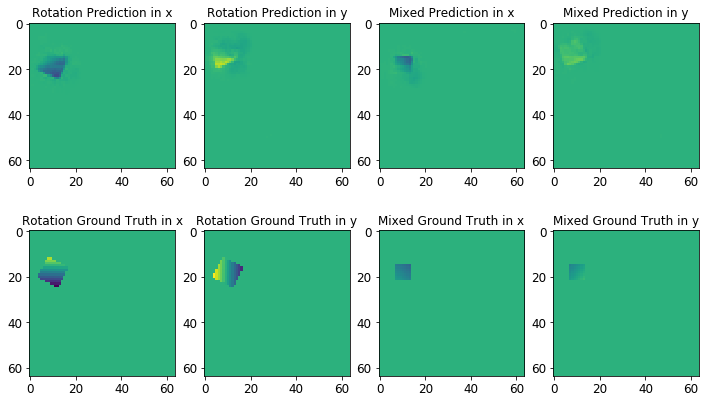

In [68]:
fig, axes = plt.subplots(2, 4, figsize=(12,7))

print("Prediction and ground truth of the example images in the test set.")
# im = axes[0, 0].imshow(rot_test_example_pred[..., 0])
im = axes[0, 0].imshow(rot_test_example_pred[:len(rot_test_example_pred)//2, :])
im.set_norm(rot_fl_norm)
axes[0, 0].set_title('Rotation Prediction in x')
# fig.colorbar(im,ax=axes[0, 0])

# im = axes[0, 1].imshow(rot_test_example_pred[..., 1])
im = axes[0, 1].imshow(rot_test_example_pred[len(rot_test_example_pred)//2:, :])
im.set_norm(rot_fl_norm)
axes[0, 1].set_title('Rotation Prediction in y')
# fig.colorbar(im,ax=axes[0, 1])

# im = axes[1, 0].imshow(rot_test_example_gt[..., 0])
im = axes[1, 0].imshow(rot_test_example_gt[:len(rot_test_example_gt)//2, ...])
im.set_norm(rot_fl_norm)
axes[1, 0].set_title('Rotation Ground Truth in x')
# fig.colorbar(im,ax=axes[1, 0])

# im = axes[1, 1].imshow(rot_test_example_gt[..., 1])
im = axes[1, 1].imshow(rot_test_example_gt[len(rot_test_example_gt)//2:, ...])
im.set_norm(rot_fl_norm)
axes[1, 1].set_title('Rotation Ground Truth in y')
# fig.colorbar(im,ax=axes[1, 1])

#############################################################
# im = axes[0, 2].imshow(mix_test_example_pred[..., 0])
im = axes[0, 2].imshow(mix_test_example_pred[:len(mix_test_example_pred)//2, :])
im.set_norm(mix_fl_norm)
axes[0, 2].set_title('Mixed Prediction in x')
# fig.colorbar(im,ax=axes[0, 2])

# im = axes[0, 3].imshow(mix_test_example_pred[..., 1])
im = axes[0, 3].imshow(mix_test_example_pred[len(mix_test_example_pred)//2:, :])
im.set_norm(mix_fl_norm)
axes[0, 3].set_title('Mixed Prediction in y')
# fig.colorbar(im,ax=axes[0, 3])

# im = axes[1, 2].imshow(mix_test_example_gt[..., 0])
im = axes[1, 2].imshow(mix_test_example_gt[:len(mix_test_example_gt)//2, ...])
im.set_norm(mix_fl_norm)
axes[1, 2].set_title('Mixed Ground Truth in x')
# fig.colorbar(im,ax=axes[1, 2])

# im = axes[1, 3].imshow(mix_test_example_gt[..., 1])
im = axes[1, 3].imshow(mix_test_example_gt[len(mix_test_example_gt)//2:, ...])
im.set_norm(mix_fl_norm)
axes[1, 3].set_title('Mixed Ground Truth in y')
# fig.colorbar(im,ax=axes[1, 3])

plt.show()